In [81]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [83]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [84]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [85]:
%%time
# change the path if needed
flights_df = pd.read_csv("2008.csv.bz2", usecols=dtype.keys(), dtype=dtype)

CPU times: user 1min 6s, sys: 1.78 s, total: 1min 8s
Wall time: 1min 10s


In [86]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [87]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [88]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [89]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


In [90]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


In [91]:
flights_df['UniqueCarrier'].nunique()

20

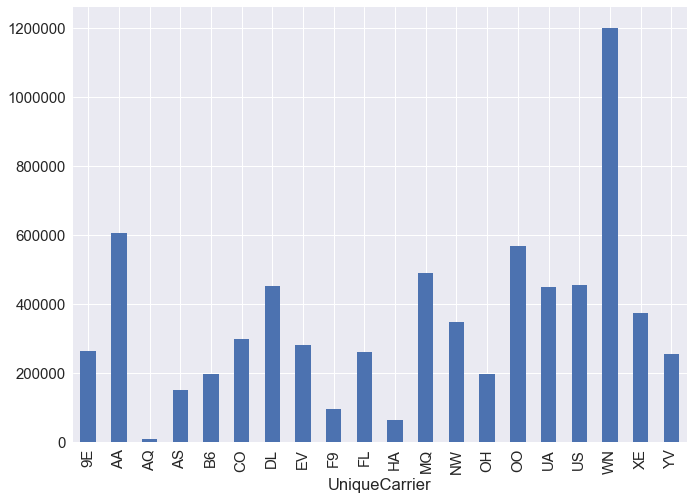

In [92]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

In [93]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

In [94]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

In [95]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


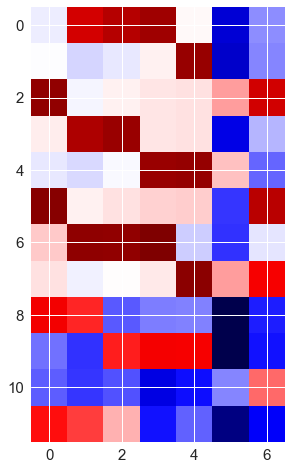

In [96]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

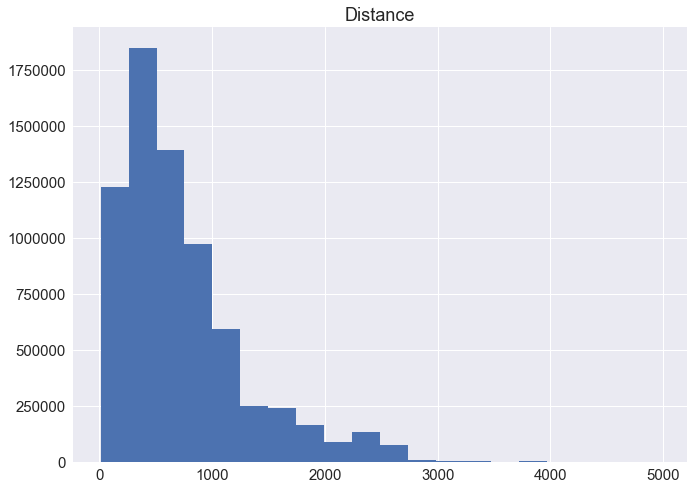

In [97]:
flights_df.hist('Distance', bins=20);

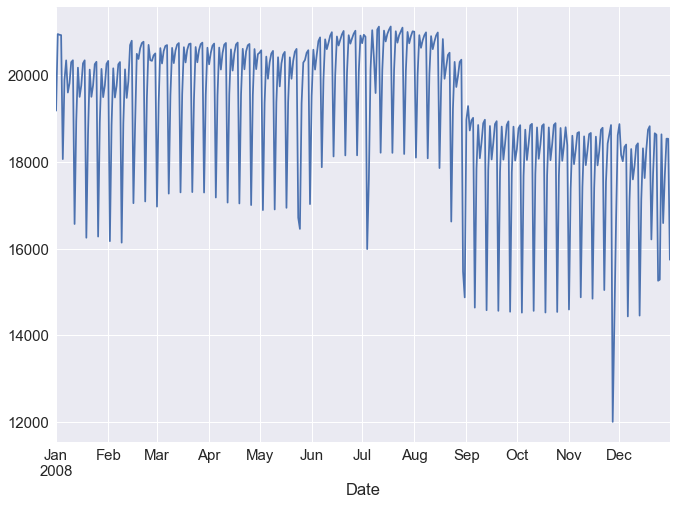

In [98]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])
num_flights_by_date = flights_df.groupby('Date').size()
num_flights_by_date.plot();

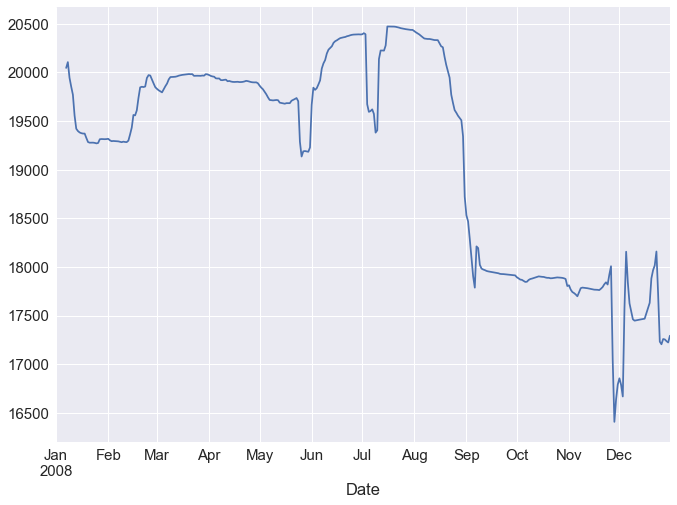

In [99]:
num_flights_by_date.rolling(window=7).mean().plot();

# 1. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?
Which of the listed below is not in your top-10 list?

DL
AA
OO
EV


In [100]:
flights_df["UniqueCarrier"].value_counts().sort_values(ascending=False).iloc[:10]

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

In [101]:
flights_df["Cancelled"].unique()

array([0, 1], dtype=uint64)

In [102]:
flights_df[flights_df["Cancelled"]==1]["UniqueCarrier"].value_counts()

MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
OH     6462
EV     5026
CO     3702
B6     3205
NW     2906
FL     2236
AS     2139
HA      570
F9      303
AQ       42
Name: UniqueCarrier, dtype: int64

In [103]:
completed=flights_df["UniqueCarrier"].value_counts() - flights_df[flights_df["Cancelled"]==1]["UniqueCarrier"].value_counts()

In [104]:
completed.sort_values(ascending=False).iloc[:10]
#EV - answer (DL AA OO EV)

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

# 2. Plot distributions of flight cancellation reasons (CancellationCode).
What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)

carrier
weather conditions
National Air System
security reasons

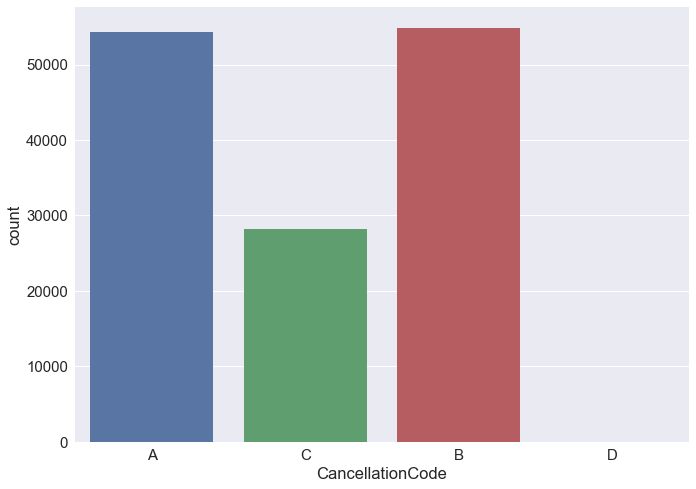

In [105]:
sns.countplot(x="CancellationCode", data=flights_df);

In [106]:
# CancellationCode
# B (Weather)- answer (A Carrier B Weather C National Air System D Security)

# 3. Which route is the most frequent, in terms of the number of flights?
(Take a look at 'Origin' and 'Dest' features. Consider A->B and B->A directions as different routes)

New-York – Washington
San-Francisco – Los-Angeles
San-Jose – Dallas
New-York – San-Francisco

In [107]:
flights_df["Route"]=flights_df["Origin"] + "-" + flights_df["Dest"]  

In [108]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Route
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,IAD-TPA
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,IAD-TPA
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,IND-BWI
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03,IND-BWI
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03,IND-BWI


In [109]:
flights_df["Route"].value_counts().sort_values(ascending=False).head()

SFO-LAX    13788
LAX-SFO    13390
OGG-HNL    12383
LGA-BOS    12035
BOS-LGA    12029
Name: Route, dtype: int64

In [110]:
# SFO-LAX - answer (San-Francisco – Los-Angeles)

# 4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

449
539
549
668

In [111]:
delayed=flights_df[flights_df["DepDelay"] > 0]["Route"].value_counts().sort_values(ascending=False).head().index.tolist()
#delayed.drop([:,1]) # не получается дропнуть
print(delayed)

['LAX-SFO', 'DAL-HOU', 'SFO-LAX', 'ORD-LGA', 'HOU-DAL']


In [112]:
flights_df["WeatherDelay"].unique()

array([             nan,   0.00000000e+00,   2.40000000e+01,
         1.20000000e+01,   2.20000000e+01,   7.00000000e+00,
         2.50000000e+01,   1.35000000e+02,   3.00000000e+00,
         1.00000000e+00,   1.10000000e+01,   4.00000000e+00,
         1.30000000e+01,   5.00000000e+00,   8.10000000e+01,
         7.80000000e+01,   7.20000000e+01,   2.10000000e+01,
         8.00000000e+00,   3.70000000e+01,   5.50000000e+01,
         1.57000000e+02,   2.00000000e+00,   2.02000000e+02,
         2.60000000e+01,   6.80000000e+01,   2.30000000e+01,
         4.80000000e+01,   3.20000000e+01,   4.60000000e+01,
         3.30000000e+01,   6.00000000e+01,   5.40000000e+01,
         1.89000000e+02,   1.98000000e+02,   1.00000000e+01,
         3.80000000e+01,   7.00000000e+01,   1.16000000e+02,
         3.10000000e+01,   6.00000000e+00,   1.80000000e+01,
         7.70000000e+01,   1.20000000e+02,   6.30000000e+01,
         1.17000000e+02,   5.00000000e+01,   1.60000000e+01,
         1.70000000e+01,

In [113]:
flights_df[(flights_df["Route"].isin(delayed)) & (flights_df["WeatherDelay"] >0)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Route
402,2008,1,3,4,2008.0,WN,646,129.0,123.0,LAX,...,337,0,NaN,0.0,24.0,6.0,0.0,99.0,2008-01-03,LAX-SFO
3841,2008,1,4,5,1440.0,WN,680,236.0,230.0,LAX,...,337,0,NaN,0.0,202.0,6.0,0.0,28.0,2008-01-04,LAX-SFO
5334,2008,1,4,5,1946.0,WN,442,113.0,101.0,SFO,...,337,0,NaN,0.0,70.0,12.0,0.0,31.0,2008-01-04,SFO-LAX
7014,2008,1,5,6,1604.0,WN,656,93.0,94.0,LAX,...,337,0,NaN,0.0,93.0,0.0,0.0,0.0,2008-01-05,LAX-SFO
7016,2008,1,5,6,1533.0,WN,776,156.0,168.0,LAX,...,337,0,NaN,0.0,150.0,0.0,0.0,6.0,2008-01-05,LAX-SFO
9998,2008,1,6,7,1549.0,WN,656,76.0,79.0,LAX,...,337,0,NaN,0.0,48.0,0.0,0.0,28.0,2008-01-06,LAX-SFO
16748,2008,1,8,2,2220.0,WN,593,148.0,146.0,LAX,...,337,0,NaN,0.0,29.0,2.0,0.0,117.0,2008-01-08,LAX-SFO
27062,2008,1,11,5,1207.0,WN,680,79.0,77.0,LAX,...,337,0,NaN,0.0,77.0,2.0,0.0,0.0,2008-01-11,LAX-SFO
42690,2008,1,16,3,2204.0,WN,62,28.0,34.0,HOU,...,239,0,NaN,0.0,2.0,0.0,0.0,26.0,2008-01-16,HOU-DAL
49548,2008,1,18,5,2144.0,WN,60,35.0,43.0,HOU,...,239,0,NaN,0.0,17.0,0.0,0.0,18.0,2008-01-18,HOU-DAL


In [114]:
# 668-answer

# 5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.
Choose all correct statements:

Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
Flights are uniformly distributed within time interval [0-23].
In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [115]:
flights_df["DepTime"].describe()

count    6873482.0
mean           NaN
std            NaN
min            1.0
25%          928.0
50%         1325.0
75%         1728.0
max         2400.0
Name: DepTime, dtype: float64

In [116]:
flights_df["DepTime_1"]=round(flights_df["DepTime"].dropna()/100,0)

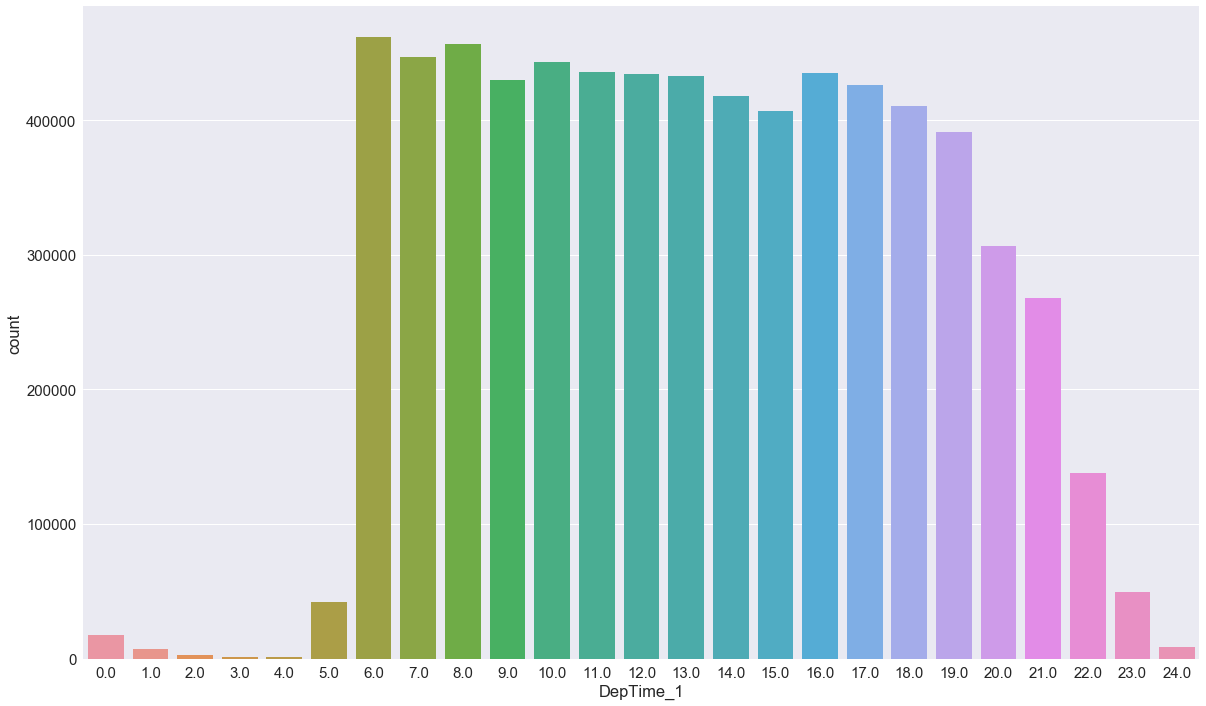

In [117]:
_, axes = plt.subplots(figsize=(20,12))
sns.countplot(x="DepTime_1", data=flights_df);

In [118]:
# In the period from 0 am to 4 am there are considerably less flights than at 7pm. (answer)

# 6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.
Choose all correct statements:

The number of flights during weekends is less than during weekdays (working days).
The lowest number of flights is on Sunday.
There are less flights during winter than during summer.

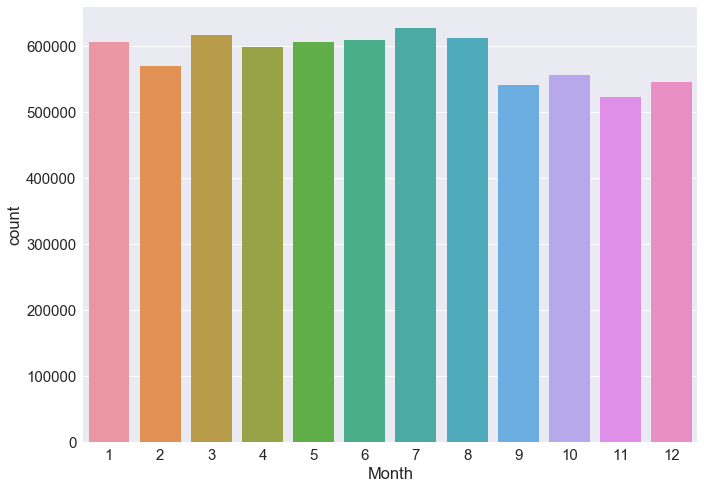

In [119]:
sns.countplot(x="Month",data=flights_df);

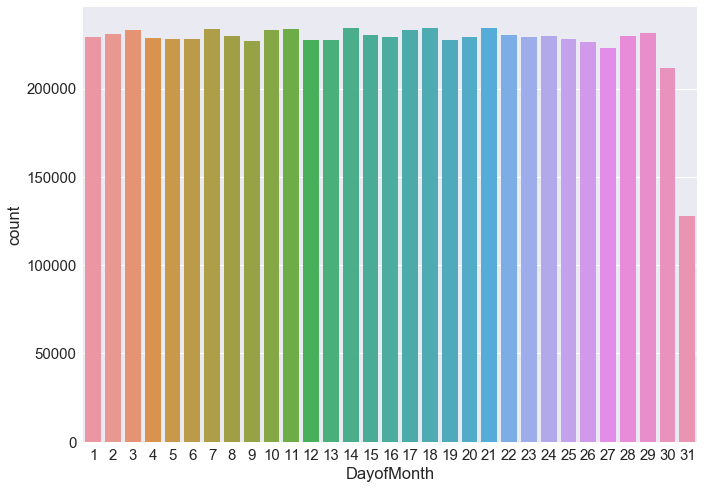

In [120]:
sns.countplot(x="DayofMonth",data=flights_df);

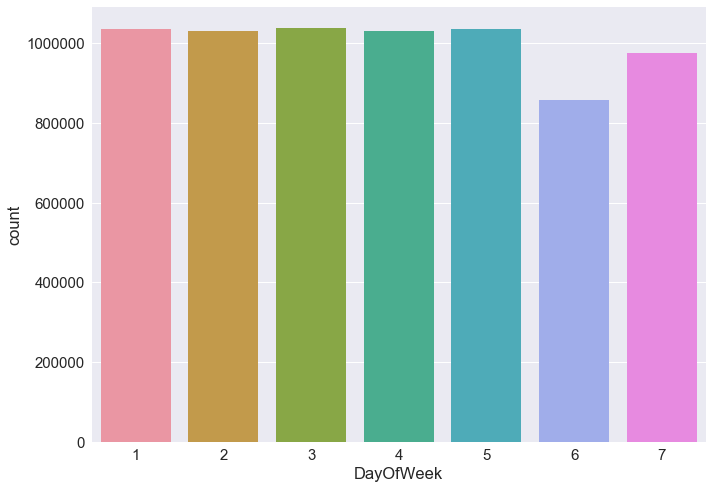

In [121]:
sns.countplot(x="DayOfWeek",data=flights_df);

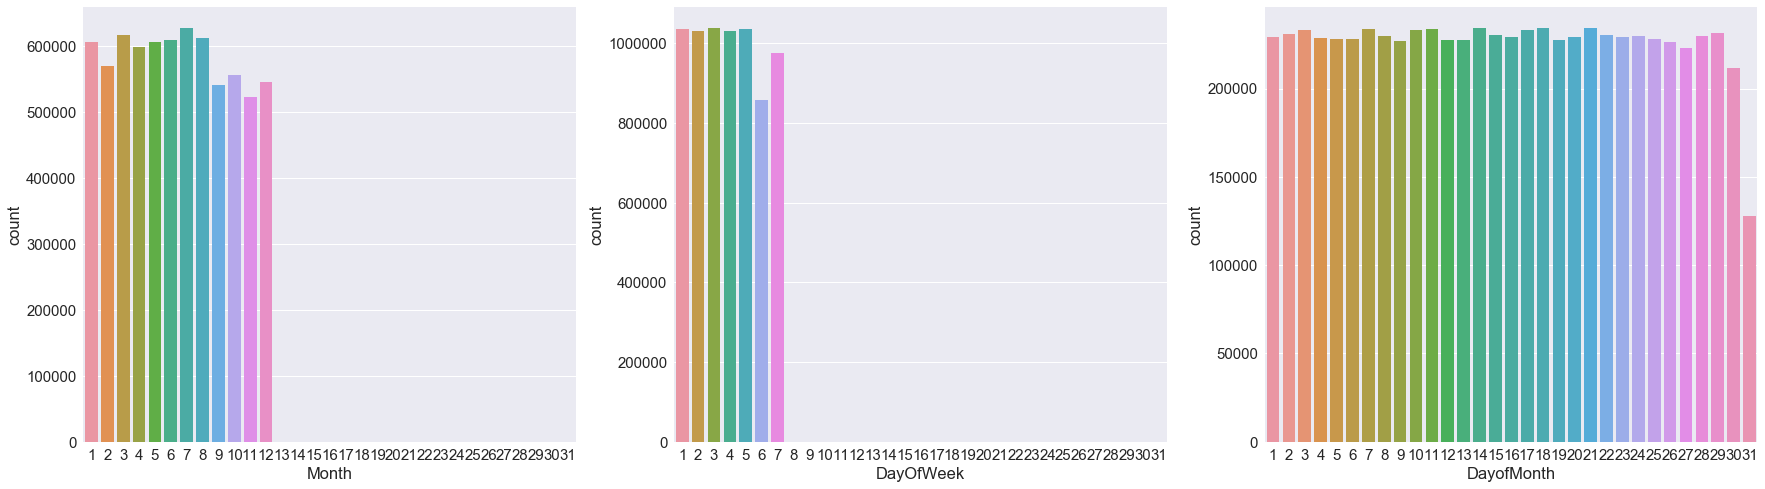

In [122]:
_, axes = plt.subplots(1, 3, sharex=True, figsize=(30, 8))

sns.countplot(x="Month",data=flights_df, ax=axes[0]);
sns.countplot(x="DayOfWeek",data=flights_df, ax=axes[1]);
sns.countplot(x="DayofMonth",data=flights_df, ax=axes[2]);

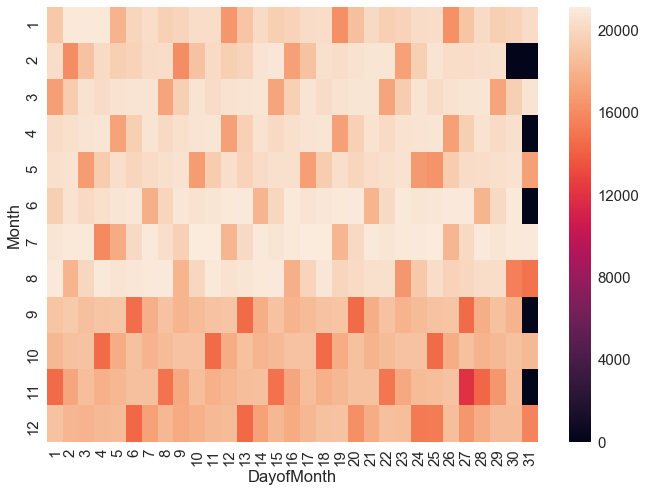

In [123]:
sns.heatmap(pd.crosstab(flights_df["Month"], flights_df["DayofMonth"]))

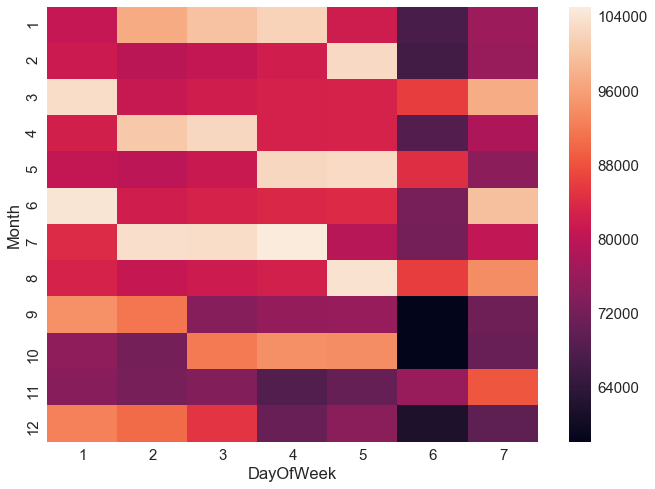

In [124]:
sns.heatmap(pd.crosstab(flights_df["Month"], flights_df["DayOfWeek"]))

In [125]:
# The number of flights during weekends is less than during weekdays (working days). YES
# The lowest number of flights is on Sunday. NO (Saturday)
# There are less flights during winter than during summer. YES

# 7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.
Choose all correct statements:

December has the highest rate of cancellations due to weather.
The highest rate of cancellations in September is due to Security reasons.
April's top cancellation reason is carriers.
Flights cancellations due to National Air System are more frequent than those due to carriers.

In [126]:
flights_df["CancellationCode"]=flights_df["CancellationCode"].map({"A":"Carrier", "B":"Weather", "C":"National Air System", "D":"Security"})
flights_df["CancellationCode"].unique()


array([nan, 'Carrier', 'National Air System', 'Weather', 'Security'], dtype=object)

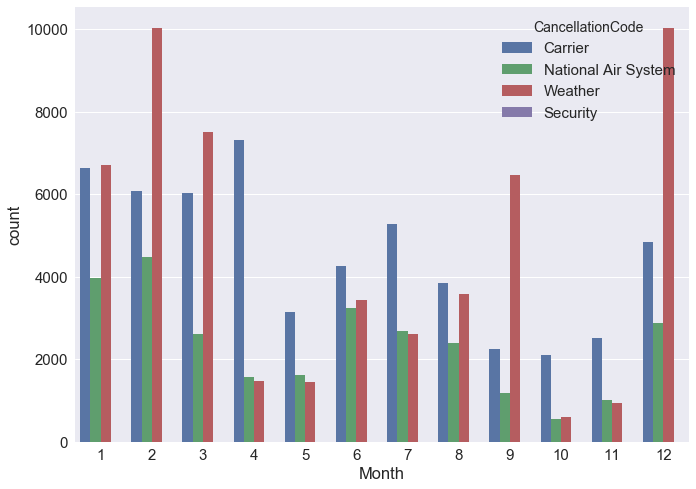

In [127]:
sns.countplot(x="Month",data=flights_df, hue = "CancellationCode");

In [128]:
flights_df["CancellationCode"].unique()

array([nan, 'Carrier', 'National Air System', 'Weather', 'Security'], dtype=object)

In [129]:
flights_df[flights_df["CancellationCode"]=="Weather"]["Month"].value_counts().sort_values(ascending=False)

12    10042
2     10034
3      7520
1      6711
9      6478
8      3582
6      3448
7      2612
4      1479
5      1461
11      937
10      600
Name: Month, dtype: int64

In [130]:
#  answer (A Carrier B Weather C National Air System D Security)
#December has the highest rate of cancellations due to weather. (YES) 
#The highest rate of cancellations in September is due to Security reasons.(NO) 
#April's top cancellation reason is carriers. (YES)
#Flights cancellations due to National Air System are more frequent than those due to carriers.(NO)

# 8. Which month has the greatest number of cancellations due to Carrier?

May
January
September
April

In [131]:
flights_df[flights_df["CancellationCode"]=="Carrier"]["Month"].value_counts().sort_values(ascending=False)

4     7312
1     6635
2     6090
3     6038
7     5292
12    4850
6     4251
8     3852
5     3157
11    2510
9     2246
10    2097
Name: Month, dtype: int64

In [132]:
# sns.countplot(x="Month",data=flights_df, hue = flights_df[flights_df["CancellationCode"]=="Carrier"]); #??

In [133]:
# April - answer

# 9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

9E
EV
HA
AA

In [134]:
flights_df[(flights_df["CancellationCode"]=="Carrier") & 
           (flights_df["Month"]==4)]["UniqueCarrier"].value_counts() #.max() # change MONTH!!!

AA    3696
WN     533
UA     494
YV     454
9E     391
US     335
OO     298
MQ     283
DL     226
AS     135
NW     122
FL      81
OH      76
CO      50
B6      43
XE      30
HA      29
EV      29
F9       7
Name: UniqueCarrier, dtype: int64

In [135]:
# AA - answer

# 10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay'). Boxplots can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.

EV
OO
AA
AQ

In [136]:
#flights_df["ArrDelay0"]=flights_df[flights_df["ArrDelay"] >0]["ArrDelay"]
#print(flights_df.head())
#flights_df.groupby("UniqueCarrier")["ArrDelay0"].median()
#mask1 = flights_df.apply(lambda row: row["ArrDelay"] > 0, axis=1)
#mask2 = flights_df.apply(lambda row: row["DepDelay"] > 0, axis=1)
#flights_df[(mask1) & (mask2)].head()

In [137]:
flights_df10=flights_df[(flights_df["ArrDelay"] >0) & (flights_df["DepDelay"] >0) 
                        & (flights_df["DepDelay"] < flights_df["DepDelay"].quantile(q=0.95)) 
                        & (flights_df["ArrDelay"] < flights_df["ArrDelay"].quantile(q=0.95))]

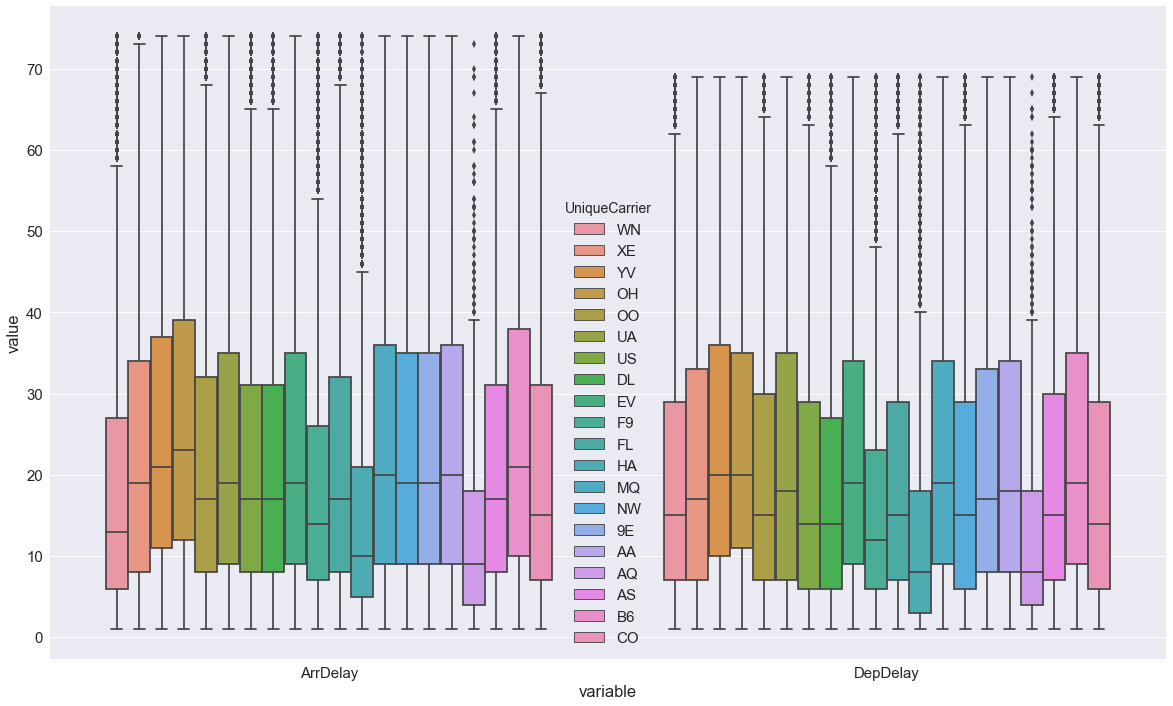

In [138]:
_, axes = plt.subplots(figsize=(20,12))
df1 = pd.melt(flights_df10, value_vars=["ArrDelay", "DepDelay"], id_vars="UniqueCarrier") #, id_vars="Month" or "UniqueCarrier"
sns.boxplot(x="variable", y="value", hue="UniqueCarrier", data=df1) #hue="Month", or "UniqueCarrier"
plt.show()

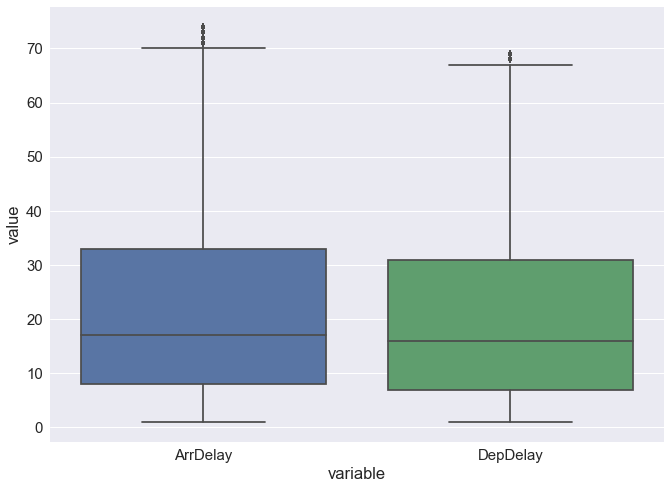

In [139]:
df1 = pd.melt(flights_df10, value_vars=["ArrDelay", "DepDelay"]) #, id_vars="Month" or "UniqueCarrier"
sns.boxplot(x="variable", y="value", data=df1) #hue="Month", or "UniqueCarrier"
plt.show()

In [140]:
flights_df10.groupby("UniqueCarrier")["ArrDelay"].median().sort_values(ascending=False)

UniqueCarrier
OH    23.0
YV    21.0
B6    21.0
MQ    20.0
AA    20.0
EV    19.0
XE    19.0
9E    19.0
NW    19.0
UA    19.0
OO    17.0
DL    17.0
US    17.0
AS    17.0
FL    17.0
CO    15.0
F9    14.0
WN    13.0
HA    10.0
AQ     9.0
Name: ArrDelay, dtype: float16

In [143]:
flights_df10.groupby("UniqueCarrier")["DepDelay"].median().sort_values(ascending=False)

UniqueCarrier
YV    20.0
OH    20.0
MQ    19.0
B6    19.0
EV    19.0
AA    18.0
UA    18.0
XE    17.0
9E    17.0
NW    15.0
OO    15.0
AS    15.0
WN    15.0
FL    15.0
DL    14.0
CO    14.0
US    14.0
F9    12.0
HA     8.0
AQ     8.0
Name: DepDelay, dtype: float16

In [142]:
# AQ - answer